# Task 3
The data set we are using here is the IPL dataset, which contains the details regarding the winner and match stats. It contains the details like teams played, winner, venue of the match, won by how many wickets and runs, toss decision, whether DLS applied or not, names of the umpires etc. Performing exploratory data analysis and data engineering on this data is very important.

In [1]:
#As usual, the first step is importing all the required libraries.

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

So let’s import the dataset. We’ve already discussed the dataset.


In [2]:
data = pd.read_csv("matches.csv")

In [3]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Let’s get a brief summary of the IPL dataset

In [4]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


Checking whether there are any null values present in the dataset.

In [5]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

As you can see, the values of umpire3 are null in almost all rows, so we are dropping the column umpire3. And also dropped some rows containing the null values after removing the umpire3 column.

In [6]:
data = data.iloc[:,:-1]
data.dropna(inplace=True)

Now let’s look into the total teams listed in this dataset.

In [7]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

Here you can see the name Delhi Daredevils and Delhi Capitals; Delhi Daredevils is the old name of the Delhi Capitals. Similarly, Decan Chargers is the old name of Sunrisers Hyderabad. So we are changing the old name to the newer one.

In [8]:
#for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

Visualizations
Number of IPL matches won by each team.

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

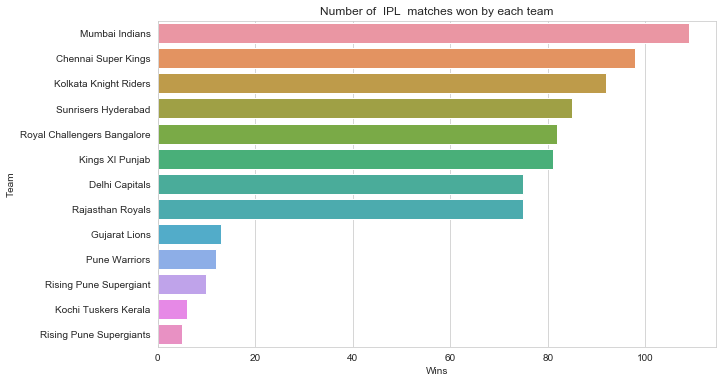

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Total number of matches played in a different stadium

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

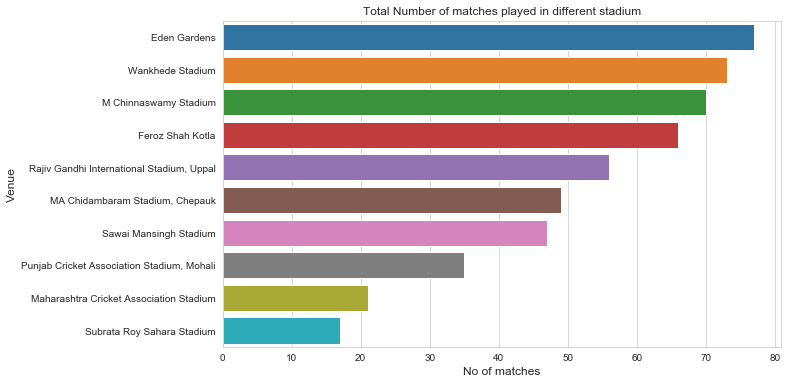

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

The decision was taken by the toss winning team.

Text(0.5, 1.0, 'Toss Decision')

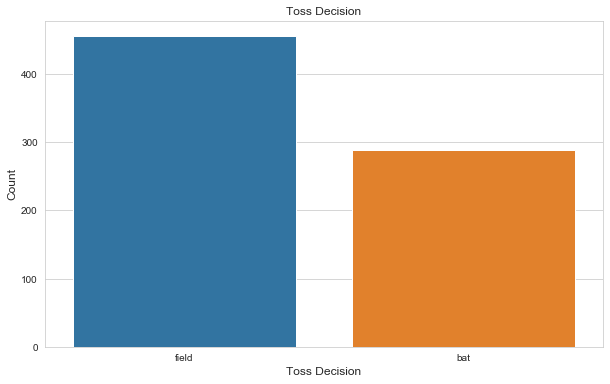

In [11]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

Now let’s check the unique values presented in each feature.

In [12]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Visakhapatnam      12
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Cuttack             7
Abu Dhabi           7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley   

We don’t need all the features or columns in order to create the model. It will reduce model accuracy, so we are dropping some of the features that don’t affect our result.

In [13]:
data.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [14]:
data.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9


We can convert our data into dependent and independent.

In [15]:
X = data.drop(["winner"], axis=1)
y = data["winner"]

several categorical values are present in the input data, so we are converting them into numerical values using the pandas, get_dummies method.

In [16]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

The output data is also a categorical value, so we are converting it into numerical using LabelEncoder of sklearn.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Now let’s convert our data into a training set in order to create the model and test set for evaluating the created model.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# Model Creation and Evaluation
The next and most important step in the model creation step. So we are using Random Forest Classification, Logistic Regression and Decision Tree Classification for this.

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")

Training the random forest classifier model

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predicting the model with x_test values and saving it as y_pred

In [21]:
y_pred = model.predict(x_test)

Using the accuracy score of sklearn, we are evaluating the predicted result and accuracy of the model

In [22]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)


In [23]:
print(ac)

0.9060402684563759


# Conclusion
This project shows the implementation of the IPL Win prediction model. You have got an insight into how to analyze a given raw data and convert that into useful features by removing unwanted features, that is, performing exploratory data analysis. So let’s identify the main key points from the project.<br>

**IPL Dataset analysis**: This analysis includes checking for null values and replacing them, describing the dataset’s feature columns, and analyzing each feature.<br>
**Visualization of data**: Done a graphical representation of the dataset in order to get an understanding of the teams, matches and the toss decision of the IPL Matches<br>
**Performed preprocessing techniques on the IPL Data**: Performed several feature engineering techniques in order to make the dataset suitable for making the model. Encoding for converting categorical features to numerical features and techniques to avoid null values are used.<br>
**Model creation and Evaluation**: This was the main part of the project, and we used the RandomForestClassifier model. Later we tested this model with the test set for evaluation.<br>